# IDS Assignment Part 1 - <font color="red"><h7>Deadline: 18/12/2022 23:59</h7></font>
This is the first part of the assignments in IDS 2022/2023. 
Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. This is the _only_ file that is required. A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

<font color="red"><b>Student Names and IDs:
    
    1. Minh Nghia Phan, 394806
    
    2. 
    
    3.

For those using Jupyter Notebook in your local environments, please install the following library in your environment:
```pip install umap-learn==0.5.3```

In [1]:
#your imports (only use libraries provided in the environment)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# set global random seed
RANDOM_SEED = 100

# Pricing your AirBnB

You finally made it! Working as a data scientist at an established process mining company in New York, you earned so much money that you can buy a flat for yourself. You decide to buy a 2-room apartment in Manhattan. Congratulations!

Currently, you are still living in your rental apartment and are tied to a long-running rental contract. You can only use the apartment in 5 years from now. Therefore, you want to use the apartment as an AirBnB in the meantime, generating some consistent income. 


You have no clue how you should price your AirBnB per night (you are living in New York, so you never needed to book an AirBnB). You decide to leverage your unique skill set and perform a data-driven, informed decision. You collect all the data you can get your hands on by traversing all New York apartments. The retrieved data set **AirBnB_original.csv** is your starting point for investigation.

## Question 1: Exploring the Data Set

As with every data set, you first want to know what you are dealing with. You perform some exploratory data analysis and clean the data along the way.

Show a few data points contained in the data set. Include all attributes.

In [2]:
# Your answer goes here
# Show the first 10 data points
df_original = pd.read_csv('AirBnB_original.csv')
df_original.head(10)

,id,host id,neighborhood group,neighborhood,lat,long,country,country code,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,number rooms
0,1001254,80014485718,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,966,193.0,7.0,9.0,4.0,6.0,1
1,1002102,52335172823,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,142,28.0,7.0,45.0,4.0,2.0,2
2,1002403,78829239556,Manhattan,Harlem,40.80902,-73.94190,United States,US,0,flexible,Private room,2005.0,620,124.0,3.0,0.0,5.0,1.0,1
3,1002755,85098326012,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,0,moderate,Entire home/apt,2005.0,368,74.0,7.0,270.0,4.0,1.0,2
4,1003689,92037596077,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,204,41.0,7.0,9.0,3.0,1.0,1
5,1004650,61300605564,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2015.0,71,14.0,7.0,49.0,5.0,1.0,1
6,1005202,90821839709,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2009.0,1060,212.0,7.0,49.0,5.0,1.0,1
7,1005754,79384379533,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,US,0,strict,Private room,2005.0,1018,204.0,2.0,430.0,3.0,1.0,1
8,1006859,1280143094,Manhattan,Chinatown,40.71344,-73.99037,United States,US,0,flexible,Entire home/apt,2004.0,319,64.0,1.0,160.0,3.0,4.0,1
9,1007411,18824631834,Manhattan,Upper West Side,40.80316,-73.96545,United States,US,0,flexible,Entire home/apt,2008.0,606,121.0,5.0,53.0,4.0,1.0,2


### Basic Cleaning

First, you have to remove NaN entries across the data set such that we only keep rows without any NaN value. How many rows did you remove?

In [3]:
# Your answer goes here
df_original_no_nan = df_original.dropna() # data without rows with NaN
print(f"Number of removed rows is {len(df_original) - len(df_original_no_nan)}")

Number of removed rows is 1477


Since duplicated entries are misleading, we want to remove duplicate flats (identified by their id), such that we only keep them once and create a new dataset. How many duplicates are removed?

In [4]:
# Your answer goes here
df_no_dup = df_original_no_nan.drop_duplicates(subset=['id']) # data without duplicate flats
print(f"Number of removed duplicates is {len(df_original_no_nan) - len(df_no_dup)}")

Number of removed duplicates is 389


From now on, you work with the dataset **AirBnB_cleaned.csv**.

To get a feeling for nightly prices in New York, you take a look at the price attribute. Calculate the average price, the first and third quantiles, and the standard deviation.

In [5]:
# Import cleaned data
df_cleaned = pd.read_csv("AirBnB_cleaned.csv")
# Get some statistics of price
price_summary = df_cleaned["price"].describe()
price_summary

count    70842.000000
mean       625.463680
std        331.236241
min         50.000000
25%        340.000000
50%        625.000000
75%        913.000000
max       1200.000000
Name: price, dtype: float64

In [6]:
# Your answer goes here
# Answers to the question
print(f"The average price is {price_summary['mean']}")
print(f"The first quantile is {price_summary['25%']}")
print(f"The third quantile is {price_summary['75%']}")
print(f"The standard deviation is {price_summary['std']}")

The average price is 625.4636797380085
The first quantile is 340.0
The third quantile is 913.0
The standard deviation is 331.23624102553555


You want to get a more visual picture of the price range. Use a histogram and boxplot to show the distribution of prices on the entire dataset.

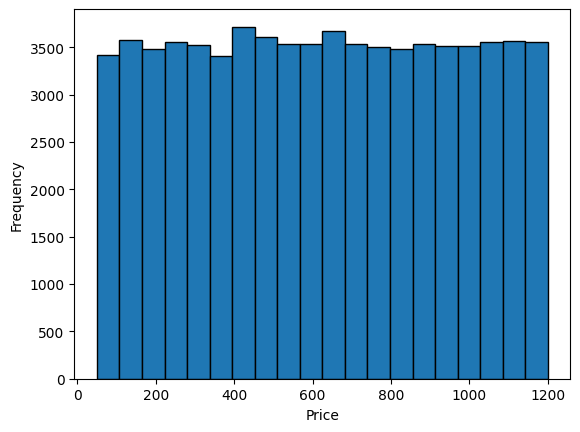

In [7]:
# Your answer goes here
# Draw the histogram
plt.hist(df_cleaned['price'], bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

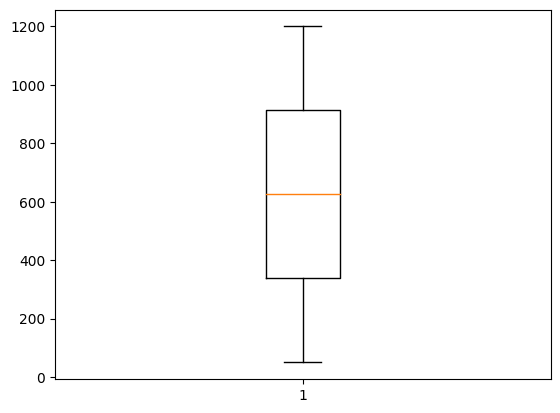

In [8]:
# Draw the boxplot
plt.boxplot(df_cleaned['price'], showfliers=True)
plt.show()

### Exploring Price Relationships

To inform our pricing decision, we want to investigate some differentiating factors for pricing apartments.

Since you have an overview of the prices and their distribution, you want to investigate which features of your dataset you might use to make your pricing decision. To do so, discuss each feature of the dataset and already rule out features that will definitely not impact the pricing decision. Below you can find a brief description of each feature: 

- id: Unique identifier for an apartment
- host id: Identifier of the host offering a certain apartment
- neighborhood group: Name of a neighborhood group in which an apartment is located
- neighborhood: More fine-grained view on neighborhoods than neighborhood group
- lat: Latitude coordinate of an apartment
- long: Longitude coordinate of an apartment
- country: The country in which an apartment is located
- country code: Code of the country in which an apartment is located
- instant bookable: Boolean values if an apartment is instantly bookable
- cancellation policy: Policy for cancellation of booking
- room type: Type of apartment/room
- construction year: Year of construction of apartment
- price: Price for renting an apartment
- service fee: Fee of service
- minimum nights: Number of minimum nights to rent an apartment
- number of reviews: Number of reviews for an apartment
- review rate number:  Review rate for an apartment (1 to 5)
- calculated host listings count: Number of listings a host has
- number rooms: Number of rooms in an apartment

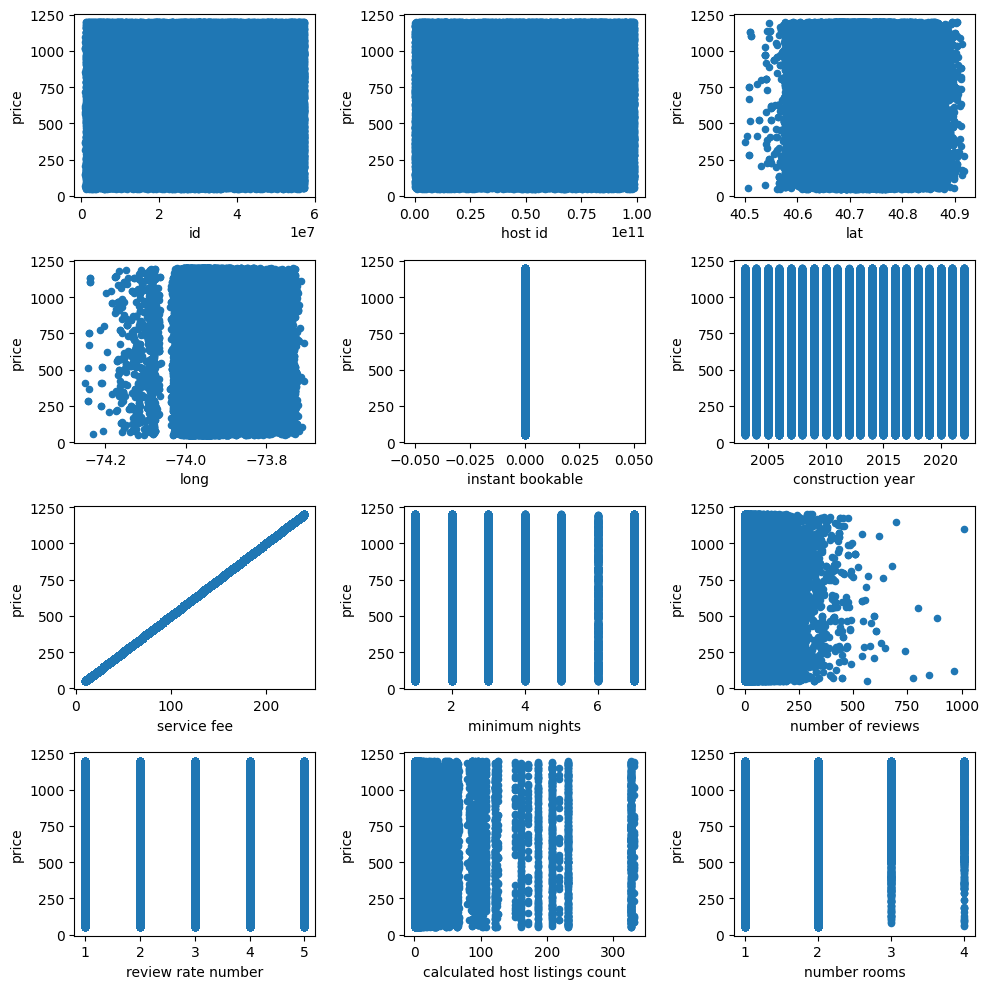

In [9]:
# Your answer goes here
import math

# list of continuous features
cont_feats = list(df_cleaned._get_numeric_data().columns)
cont_feats.remove('price')

num_cols = 3
num_rows = math.ceil(len(cont_feats) / num_cols)


fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10,10))

for r in range(num_rows):
    for c in range(num_cols):
        feature = cont_feats.pop(0)
        # scatter plot for exploring relationship between
        # each continuous descriptive feature and target feature 'price'
        df_cleaned.plot.scatter(ax=axs[r,c], x=feature, y='price')

fig.tight_layout()


In [10]:
# correlation matrix between each descriptive feature and the target feature 'price'
corr_matrix = df_cleaned.corr()['price']
corr_matrix

id                                0.007083
host id                           0.006699
lat                              -0.003476
long                              0.002518
instant bookable                       NaN
construction year                -0.000497
price                             1.000000
service fee                       0.999991
minimum nights                   -0.001062
number of reviews                 0.008259
review rate number               -0.010797
calculated host listings count   -0.000796
number rooms                      0.317470
Name: price, dtype: float64

_Answer:_ 


### Univariate Analysis

In the following, you want to analyze which features influence the price. You do this univariately, i.e., look at the relationship between one feature and the price individually. No matter which features you concluded to be useful in the last task, **you will consider the following seven features: service fee, minimum nights, neighborhood group, room type, cancellation policy, construction year, and the number of rooms.**

First, we look closely at the relationship between price and service fee. To do so, create a joint plot for these two attributes. What is your finding? Is this a helpful feature for our pricing decision?

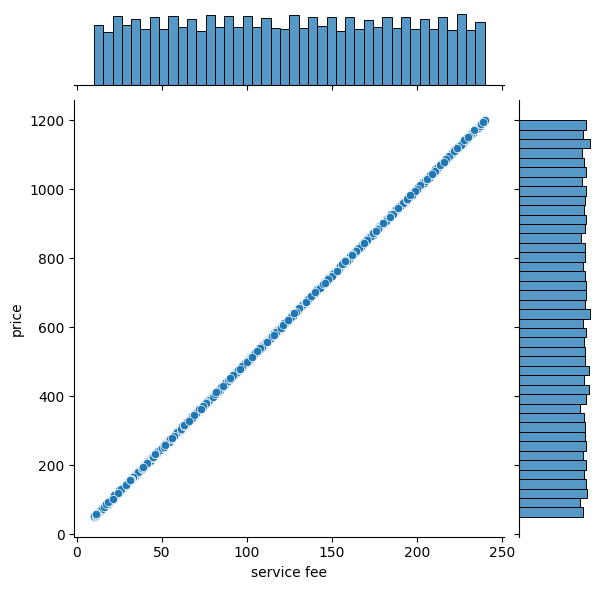

In [11]:
# Your answer goes here
sns.jointplot(x='service fee', y='price', data=df_cleaned)

_Answer:_

There is a linear positive correlation between service fee and price.
Service fee seems to be a very helpful feature (might has higher weight) for our pricing decision

Next, we are interested in the relationship between the number of minimum nights and the price. To analyze it, create a joint plot with a regression. Describe your observation.

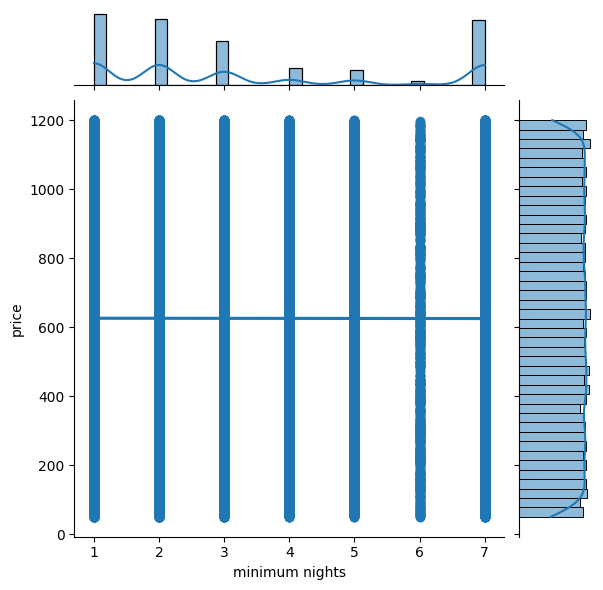

In [12]:
# Your answer goes here
sns.jointplot(x='minimum nights', y='price', data=df_cleaned, kind="reg")


_Answer:_



To further investigate the pricing decision, you look at the remaining five features: neighborhood group, room type, cancellation policy, construction year, and the number of rooms.
To get an overview, you decide to create box plots (including the mean) for each of these features to visualize their influence on the price. Describe your findings. Which values of the features influence the price?

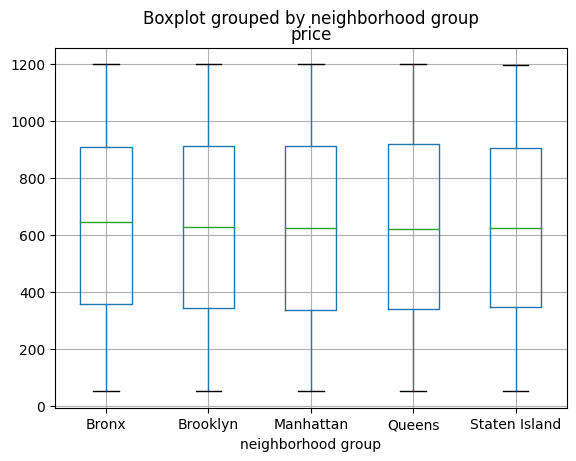

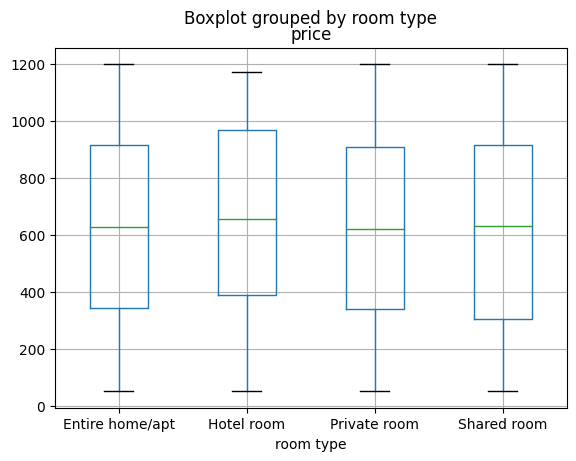

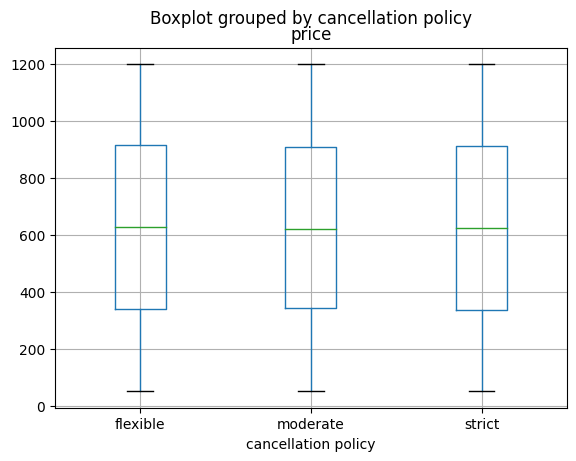

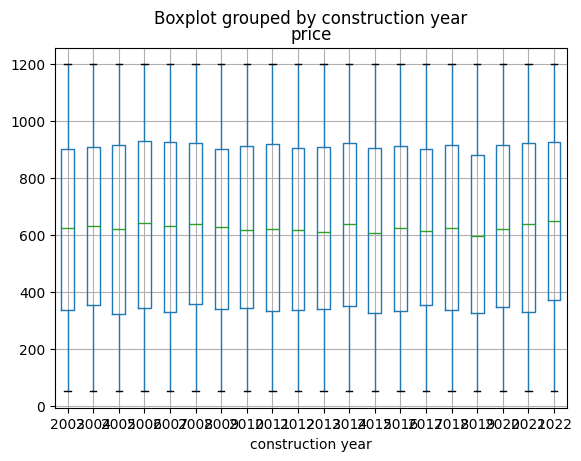

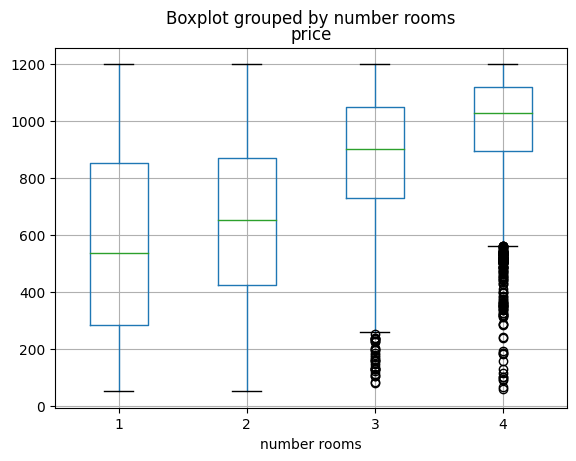

In [13]:
# Your answer goes here

feats = ["neighborhood group", "room type", "cancellation policy", "construction year", "number rooms"]


for feature in feats:
    df_cleaned.boxplot(column='price', by=feature)


_Answer:_



### Multivariate Analysis

As the univariate analysis of price relationships provided only limited insights, you decide to visualize some multivariate investigations of the price. **No matter what you concluded in the last section, you will use the features construction year, number of rooms, cancellation policy, room type, and neighborhood group in the multivariate analysis.**
For each pair of features, create a grouped boxplot (using the hue argument) and investigate whether the two features together allow for an explanation of price differences. In the end, conclude which combination of features should be used to make your pricing decision.

#### Multivariate Analysis for Neighborhood Group

In [14]:
# Your answer goes here


_Answer:_



#### Multivariate Analysis for Room Type

In [15]:
# Your answer goes here


_Answer:_


#### Multivariate Analysis for Number of Rooms

In [16]:
# Your answer goes here


_Answer:_



#### Multivariate Analysis for Construction Year

In [17]:
# Your answer goes here

_Answer:_



### Selection of Variables

Please argue: Which combinations of variables would you consider for pricing your AirBnB?

_Answer:_


## Question 2: Setting the Price

No matter what you have deducted from your analysis, from now on, you will continue only with three features: **The number of rooms, the neighborhood group, and the room type.**

**Enter Toby**: Toby is your long-term friend back from studying at RWTH. While you studied computer science, Toby studied business administration to become a big shot at Wall Street. He currently works in the back office of some swiss credit institute just across the corner from your office. You decide to drop by and get some of his input for your pricing decision. 

Toby proposes to first use comparables pricing to price your apartment. Comparables pricing is an established concept in economics and means that you price your apartment close to similar apartments. 
You will use different techniques to find similar apartments and set a price.

## Baseline

First, you want to set a baseline to compare against. The baseline should always use the average price of all apartments as a recommended price. Evaluate on a test set of 5%. The same test set should also be used later (you can use the random_state argument in scikit learn's train_test_split, but you need to stay consistent for different questions).

In [18]:
# Your answer goes here
from sklearn.model_selection import train_test_split

# average price of all apartments
avg_price = df_cleaned["price"].mean()
print(avg_price)

# Split to X (features) and y (target)
# X = ['number rooms', 'neighborhood group', 'room type'], y='price'
X_base, y_base = df_cleaned[['number rooms', 'neighborhood group', 'room type']], df_cleaned['price']

# IMPORTANT: Make sure column orders of X stays the same
X_base = X_base[sorted(X_base.columns)]

# Train test split with skrt learn
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.05, random_state=RANDOM_SEED)

X_base


625.4636797380085


,neighborhood group,number rooms,room type
0,Manhattan,2,Entire home/apt
1,Manhattan,1,Private room
2,Brooklyn,2,Entire home/apt
3,Manhattan,1,Entire home/apt
4,Brooklyn,1,Private room
...,...,...,...
70837,Queens,1,Private room
70838,Queens,1,Private room
70839,Queens,1,Private room
70840,Manhattan,1,Entire home/apt


## Decision Tree

Using a decision tree, you try to price your apartment according to similar apartments. 

In the following, we want to know the price ranges for renting AirBnBs. To use decision trees, you need to discretize prices. We use the following price bins:


- [50, 200]
- (200, 400]
- (400, 600]
- (600, 800]
- (800, 1000]
- (1000, 1200]

We add the attribute "Price_Bins" using the discretization mentioned above for each apartment. For example, if an apartment costs 404, it is put into the bin (400, 600].

In [19]:
# Your answer goes here

# added column 'Price_Bins'
df_cleaned['Price_Bins'] = pd.cut(df_cleaned['price'], bins=[50,200,400,600,800,1000,1200], right=True, include_lowest=True)



Consider the extended dataset from the previous task. Use 'number rooms,' 'room type,' and 'neighborhood group' as descriptive features and "Price_Bins" as the target feature. Create a test and training set like before.

In [20]:
# Your answer goes here

# Split to X (features) and y (target)
# X = ['number rooms', 'neighborhood group', 'room type'], y='Price_Bins'
y_discrete = df_cleaned['Price_Bins']

# Train test split with skrt learn
X_train_priceBins, X_test_priceBins, y_train_priceBins, y_test_priceBins = train_test_split(X_base, y_discrete, test_size=0.05, random_state=RANDOM_SEED)


Generate a decision tree in which the minimum number of samples for splitting is ten and use entropy. What is the system's entropy?

Note: For this task, you must use the p_decision_tree library.

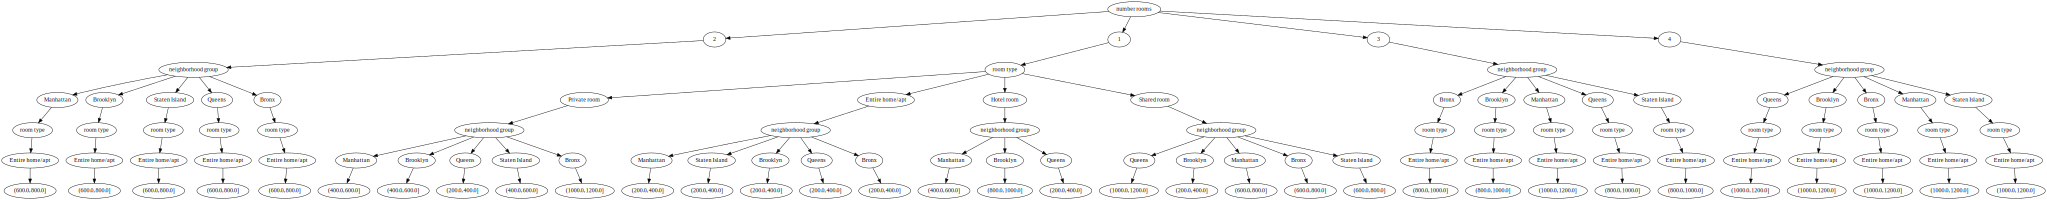

The System entropy is:  2.577072828540696


Error: no "view" mailcap rules found for type "application/pdf"
/usr/bin/xdg-open: 869: www-browser: not found


In [21]:
# Your answer goes here
from p_decision_tree.DecisionTree import DecisionTree

trainSet = X_train_priceBins.merge(y_train_priceBins,left_index=True, right_index=True)

#Converting all the considered columns to string
for column in ['number rooms', 'neighborhood group', 'room type','Price_Bins']:
    trainSet[column]= trainSet[column].astype(str)

data_descriptive = trainSet[['number rooms', 'neighborhood group', 'room type']].values
data_label = trainSet['Price_Bins'].values

#Calling DecisionTree constructor with entropy
decisionTree = DecisionTree(data_descriptive.tolist(), ['number rooms', 'neighborhood group', 'room type']
                            , data_label.tolist(), "entropy")

#pruning features (gain_threshold and minimum_samples=10)
decisionTree.id3(0,10)

#Visualizing decision tree by Graphviz (file saved in output/visualTree.gv.pdf)
dot = decisionTree.print_visualTree( render=True )

display( dot )

print("The System entropy is: ", format(decisionTree.entropy))


What is the first feature the decision tree splits on?

_Answer:_ number rooms



Since it doesn't make sense to set a price range for renting a room, we need to fix a price. For simplicity, we use the means of the bins, i.e., 125, 300, 500, 700, 900, and 1100. For example, if a room were categorized in the bin (200, 400], it would have the price of 300.

What prices are possible given your decision tree for:

- Manhattan, 1-room, Private room
- Staten Island, 1-room, Shared room

_Answer:_ 
- A room characterized by Manhattan, 1-room, Private room has a price range of (400.0, 600.0] according to our decision tree, possible price for that room would be 500.
- A room characterized by Staten Island, 1-room, Shared room has a price range of (600.0, 800.0] according to our decision tree, possible price for that room would be 700.

What is the proposed price of the decision tree for our apartment? Store it in a variable for later usage.

In [22]:
# Your answer goes here
# 2-room apartment in Manhattan

recommended_price = 700


/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'output/visualTree.gv.pdf'


To evaluate how good our decision tree is for determining price categories, we want to measure the error of the predictions on the test set. To do so, the IDS team provided you helper functions below.

In [23]:
import pydotplus, networkx

def get_name_value_dict(graph):
    id_label_dict = {}
    root = decisionTree.root
    visited = set() # Set to keep track of visited nodes of graph.

    def dfs(visited, graph, node):#function for dfs 
        id_label_dict[node.name] = node.value
        if node not in visited:
            if node.next:
                id_label_dict[node.next.name] = node.next.value
            visited.add(node)
            if node.childs:
                for child in node.childs:
                    if child is not None:
                        dfs(visited, graph, child)
            elif node.next:
                if node.next.childs:
                    for child in node.next.childs:
                        if child is not None:
                            dfs(visited, graph, child)
    dfs(visited, decisionTree, root)
    return id_label_dict

def get_predictor(tree):
    id_label_dict = get_name_value_dict(tree)
    dotplus = pydotplus.graph_from_dot_data(tree.source)
    G = networkx.nx_pydot.from_pydot(dotplus)
    root = [n for n,d in G.in_degree() if d==0][0]
    paths = []
    for node in G:
        if G.out_degree(node)==0: #it's a leaf
            paths.append(networkx.shortest_path(G, root, node))           
    new_paths = []
    for path in paths:
        for name, value in id_label_dict.items():
            path = ([p.replace(name, value) for p in path])
        new_paths.append(path)
    predictor = {}
    for path in new_paths.copy():
        target = path[-1]
        classification = tuple(path[:-1])
        predictor[classification] = target
    return predictor

def get_prediction_features(predictor):
    features = set()
    for key in predictor:
        i = 0
        while i <= len(key)-2:
            features.add(key[i])
            i +=2
    return features
            
def get_predicted_bin(instance, features, predictor):
    feature_values = {}
    for feature in features:
        feature_values[feature] = instance[feature]
    possible_paths = predictor.keys()
    i=0
    while i<=len(feature_values):
        attribute = [path[i] for path in possible_paths][0]
        if attribute in predictor.values():
            break
        feature_value = feature_values[attribute]
        candidates = []
        for el in possible_paths:
            if str(el[i+1]) == str(feature_value):
                candidates.append(el)
        possible_paths = candidates.copy()
        i+=2
    return predictor[possible_paths[0]]


### Dot is your visual decision tree. Adjust the naming if needed
predictor = get_predictor(dot)
features = get_prediction_features(predictor)

To predict the price bin for each instance of your test set, apply the function get_predicted_bin using the variables *predictor* and *features* provided above.

In [24]:
# Your answer goes here
testSet = X_test_priceBins.merge(y_test_priceBins,left_index=True, right_index=True)

# added column 'Predicted_price_bin'
testSet['Predicted_price_bin'] = X_test_priceBins.apply(lambda instance: get_predicted_bin(instance, features, predictor), axis=1)

# predict price bin for all instances of test set
testSet

,neighborhood group,number rooms,room type,Price_Bins,Predicted_price_bin
27612,Manhattan,1,Private room,"(200.0, 400.0]","(400.0, 600.0]"
18650,Manhattan,4,Entire home/apt,"(1000.0, 1200.0]","(1000.0, 1200.0]"
32416,Manhattan,1,Entire home/apt,"(200.0, 400.0]","(200.0, 400.0]"
28153,Brooklyn,2,Entire home/apt,"(400.0, 600.0]","(600.0, 800.0]"
2900,Manhattan,1,Entire home/apt,"(600.0, 800.0]","(200.0, 400.0]"
...,...,...,...,...,...
24293,Brooklyn,1,Private room,"(600.0, 800.0]","(400.0, 600.0]"
41596,Manhattan,3,Entire home/apt,"(800.0, 1000.0]","(1000.0, 1200.0]"
45813,Manhattan,3,Entire home/apt,"(1000.0, 1200.0]","(1000.0, 1200.0]"
49824,Queens,1,Private room,"(800.0, 1000.0]","(400.0, 600.0]"


You predicted a price range for AirBnBs in your test set. However, since you cannot enter a price range for renting an apartment, we have to map the range of bins to one value. To do so, we use the mean of bins, as explained before, to predict the price. Given that, compute the mean absolute error between the prediction from the decision tree and the real price provided in the dataset. What is the mean absolute error?

In [25]:
# Your answer goes here
import ast
from sklearn.metrics import mean_squared_error, mean_absolute_error
# 125, 300, 500, 700, 900, 1100

# helper function to parse bins of type string back to type Interval
def interval_type(s):
    #Parse interval string to Interval
    table = str.maketrans({'[': '(', ']': ')'})
    left_closed = s.startswith('[')
    right_closed = s.endswith(']')

    left, right = ast.literal_eval(s.translate(table))

    t = 'neither'
    if left_closed and right_closed:
        t = 'both'
    elif left_closed:
        t = 'left'
    elif right_closed:
        t = 'right'

    return pd.Interval(left, right, closed=t)


# added column 'mapped_price_bin'
testSet['mapped_price_bin'] = testSet['Price_Bins'].apply(lambda price_bin: round(price_bin.mid))

# added column 'mapped_predicted_price_bin'
testSet['mapped_predicted_price_bin'] = testSet['Predicted_price_bin'].apply(lambda price_bin: round(interval_type(price_bin).mid))

# Mean absolute error between the prediction from the decision tree (target feature predict) and the real price provided in the dataset (target feature)
print("Mean absolute error: %.2f" % mean_absolute_error(testSet['mapped_price_bin'], testSet['mapped_predicted_price_bin']))

testSet

Mean absolute error: 260.39


,neighborhood group,number rooms,room type,Price_Bins,Predicted_price_bin,mapped_price_bin,mapped_predicted_price_bin
27612,Manhattan,1,Private room,"(200.0, 400.0]","(400.0, 600.0]",300,500
18650,Manhattan,4,Entire home/apt,"(1000.0, 1200.0]","(1000.0, 1200.0]",1100,1100
32416,Manhattan,1,Entire home/apt,"(200.0, 400.0]","(200.0, 400.0]",300,300
28153,Brooklyn,2,Entire home/apt,"(400.0, 600.0]","(600.0, 800.0]",500,700
2900,Manhattan,1,Entire home/apt,"(600.0, 800.0]","(200.0, 400.0]",700,300
...,...,...,...,...,...,...,...
24293,Brooklyn,1,Private room,"(600.0, 800.0]","(400.0, 600.0]",700,500
41596,Manhattan,3,Entire home/apt,"(800.0, 1000.0]","(1000.0, 1200.0]",900,1100
45813,Manhattan,3,Entire home/apt,"(1000.0, 1200.0]","(1000.0, 1200.0]",1100,1100
49824,Queens,1,Private room,"(800.0, 1000.0]","(400.0, 600.0]",900,500


## Clustering

Another way to do comparables pricing is to find similar apartments using clustering. Each calculated cluster represents one or more similar apartments in the dataset. For each cluster, you calculate the mean price as a representative price. To predict the price for new apartments, you assign them to an existing cluster and give the mean price as prediction.

Use the same features you used in the decision tree for the clustering as well (**number rooms, neighborhood group, room type**), and remember that your dataset is still split into a training and test set.

In this task, you will use the k-means algorithm.
*Note: To keep results comparable, please use 100 for random state and n_init when initializing the clustering algorithm. Also, remember to use the same test and training set as in the previous tasks to compare performances.*

### Encoding 

K-means tries to calculate the distance between different data points. Since some of the features you want to use are not numeric, apply one-hot encoding to be able to use distance measures. Use the preprocessing module of sklearn to prepare your dataset for clustering.

In [26]:
# Your answer goes here
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

trainSet_cluster = X_train_priceBins.merge(y_train_priceBins,left_index=True, right_index=True)
testSet_cluster = X_test_priceBins.merge(y_test_priceBins,left_index=True, right_index=True)

#apply the one hot encoder
encoder = OneHotEncoder(categories='auto')
encoder.fit(trainSet_cluster)
trainSet_cluster_OneHot = encoder.transform(trainSet_cluster).toarray()
print('Transformed by One-hot Encoding: ')
print(trainSet_cluster_OneHot)

# encode labels with value between 0 and n_classes-1
encoder = LabelEncoder()
trainSet_cluster_LE = trainSet_cluster.apply(encoder.fit_transform)
print('Replacing categories by numerical labels: ')
print(trainSet_cluster_LE.head())

#apply the one hot encoder
encoder = OneHotEncoder(categories='auto')
encoder.fit(testSet_cluster)
testSet_cluster_OneHot = encoder.transform(testSet_cluster).toarray()
print('Transformed by One-hot Encoding: ')
print(testSet_cluster_OneHot)

# encode labels with value between 0 and n_classes-1
encoder = LabelEncoder()
testSet_cluster_LE = testSet_cluster.apply(encoder.fit_transform)
print('Replacing categories by numerical labels: ')
print(testSet_cluster_LE.head())


Transformed by One-hot Encoding: 
[[0. 0. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
Replacing categories by numerical labels: 
       neighborhood group  number rooms  room type  Price_Bins
23447                   2             1          0           4
44487                   2             0          2           3
2706                    2             0          0           2
60541                   2             0          2           0
1877                    1             1          0           2
Transformed by One-hot Encoding: 
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]]
Replacing categories by numerical labels: 
       neighborhood group  number rooms  room type  Price_Bins
27612                   2             0          2           1
18650                   2     

### Choosing number of clusters

In k-means, the number of wanted clusters is a parameter one can decide on. Since this is information you do not have at this time, you choose to use the data to decide.

You cluster on the training dataset by using `k` number of clusters where `k` is between 4 and 15. Since you are interested in the price, for each clustering, you calculate the **standard deviation of the mean prices for the clusters**. Therefore, for each clustering:
1. Calculate the mean price for each of the resulting clusters.
2. Calculate the standard deviation of the mean prices calculated in 1.

Plot a diagram where on the `x-axis` you will have the *number of clusters used* and on the `y-axis` the *standard deviation of the means*.

In your opinion, which amount of clusters makes more sense? Explain your answer.

In [27]:
# Your answer goes here

k_range = range(4,15)

# for each cluster
# calc mean price
# calc std of mean price

# plot diagram x=num of clusters, y=std of means
print(k_range)


range(4, 15)


_Answer:_



**Note:** No matter the conclusion made in the previous task, from now on, you use the clustering model with **9 clusters** for predicting the price for your apartment and evaluating the clustering technique.

### Pricing your apartment

To predict the price for your apartment, calculate in which cluster your apartment would be and use the mean value of the cluster as a possible price.

In [28]:
# Your answer goes here
# cluster for 9 clusters


### Evaluating clustering

You want to evaluate how well your clustering worked. In your case, two things can be evaluated:

1.   Whether the clustering technique can group similar apartments together
2.   Whether other people determine the price of their apartment as you did, meaning whether similar apartments get a similar price

You are going to evaluate the clustering technique visually. The IDS team provides you with the following fancy code that reduces your input to two dimensions.

In [29]:
import umap.umap_ as umap

#Preprocessing numerical
full_data = x_train # use the train dataset here
numerical = full_data.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = sklearn.preprocessing.PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = full_data.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(full_data.select_dtypes(include='object').columns) / full_data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.reset_local_connectivity(intersection)
embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components,
                                                fit1._initial_alpha, fit1._a, fit1._b,
                                                fit1.repulsion_strength, fit1.negative_sample_rate,
                                                200, 'random', np.random, fit1.metric,
                                                fit1._metric_kwds, False, {}, False)

# Extracting the resulting dimensions
dimension1 = embedding[0].T[0]
dimension2 = embedding[0].T[1]

NameError: name 'x_train' is not defined

Create a scatter plot from the two dimensions and use the cluster labels for coloring the data points. Use the train set for the visualization. Discuss the result.

In [ ]:
# Your answer goes here


_Answer:_



We next evaluate whether similar apartments (considering the attributes we chose) get similar prices. To do this, we use our test set. Assign each apartment of the test set to the nearest centroid. Predict the price of the apartments in the test set by taking the mean price of the cluster they was assigned to. Calculate the mean absolute error between the predicted and real prices.

In [ ]:
# Your answer goes here


### Final comments on the price prediction

Please compare the three approaches used for determining the price. Do they provide a good way of determining the price?

_Answer:_



## Question 3: Investigating Price Elasticity

You show your results to Toby, excited about the price suggestions you got from the decision tree and clustering. You decide to take the higher price, which naturally means more income.

However, he points you to one central flaw in your thinking: The number of bookings is not independent of the price. Therefore, you can not just take any price and assume that this will lead to more income than a lower price, as the demand (utilization) for your apartment might decrease. This is called **price elasticity**.

You want to verify what Toby has been telling you. You extracted the utilization column of your dataset by grabbing the available data from AirBnB's calendar (smart!). The utilization values are contained in dataset **AirBnB_utilization.csv**. **Show several graphs investigating price elasticity.** For example, you might plot the utilization in relation to the price and color according to different variable values. 
After you have verified Toby's statements, you want to learn price elasticity from the dataset (the utilization of an apartment given the price, the number of rooms, the room type, and the neighborhood group, i.e., the same features as before). With the learned price elasticity, you want to evaluate which of the proposed prices (decision tree or clustering) is the better choice.

In [ ]:
# Your answer goes here
# Import the utilization data set
df_util = pd.read_csv('AirBnB_utilization.csv')
df_util

In [ ]:
# Helper function to plot price vs utilization colored by different attributes
def plot_price_elasticity_by_att(df_util, price_col, util_col, att, xlabel='price', ylabel='utilization'):
    groups = df_util.groupby(att)
    for name, group in groups:
        plt.scatter(group[price_col], group[util_col], label=name, alpha=0.5)
        # alpha=0.5 because lot of points lie on each other
    plt.title(f"Price elasticity colored by {att}")
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend()
    plt.show()

In [ ]:
def plot_price_elasticity(df, price_col, util_col, atts, xlabel='price', ylabel='utilization'):
    for att in atts:
        plot_price_elasticity_by_att(df, price_col, util_col, att, xlabel, ylabel)

In [ ]:
# Plot some graphs about price elasticity 
plot_price_elasticity(df_util, 'price', 'utilization', ['room type', 'number rooms', 'neighborhood group'])

You will investigate the relationship between price and utilization in this subtask. First, you will train different models and choose the one that best predicts utilization for an apartment. Second, you will evaluate which of the proposed prices of decision tree and clustering prices were better, assuming that your model provides the correct utilization. Third, you will conclude your investigation and provide a pricing decision.

### Learning price elasticity
You want to use different supervised learning techniques to learn price elasticity. You decide on linear regression, SVM, and multilayer perceptrons. However, you have to preprocess the data. Use the features of the neighborhood group, the room type, the number of rooms, and the price to predict the utilization. Split into training and testing data (test size 5%).

Prepare the data set by splitting, one-hot encoding, and normalizing.

In [ ]:
# Your answer goes here
# One hot encoding
df = pd.get_dummies(df_util)
# Split to X (features) and y (target)
# id should be left out
X, y = df[set(df.columns) - set(['utilization', 'id'])], df['utilization']
# IMPORTANT: Make sure column orders of X stays the same
X = X[sorted(X.columns)]
# Train test split with skrt skrt learn
from sklearn.model_selection import train_test_split
X_train_un, X_test_un, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=RANDOM_SEED)
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler_train = MinMaxScaler()
scaler_test = MinMaxScaler()
X_train = scaler_train.fit_transform(X_train_un)
X_test = scaler_test.fit_transform(X_test_un)

For each technique, use 5-cross-fold validation and assess the performance on the test set. 

In [ ]:
# Legacy code implementing GridSearchCV that we will keep for fun :-)

# Helper to select best parameters for a classifier by 
# doing a grid search over specified params candidates.
# For each param set, perform k-cross-fold and
# then selecting the best param set by cross val score
# import sys
# from sklearn.model_selection import cross_val_score
# def param_selection(classifier, param_sets, X, y, k=5):
#     print(f"Selecting best parameters for {classifier.__name__}")
#     param_keys = [] # Storing all keys in param_sets 
#     param_lens = [] # Storing all indices of corresponding param key
#     for key, val in param_sets.items():
#         param_keys.append(key)
#         param_lens.append(tuple(range(len(val))))
#     import itertools
#     indices = list(itertools.product(*param_lens)) # All possible indices over param_sets
#     best_score = -sys.maxsize
#     best_candidate = None
#     for index in indices:
#         candidate = dict() # From the index, calculate current candidate
#         for i in range(len(index)):
#             candidate[param_keys[i]] = param_sets[param_keys[i]][index[i]]
#         print(f"Current candidate: {candidate}")
#         scores = cross_val_score(classifier(**candidate), X, y, scoring='neg_mean_absolute_error', cv=k, verbose=3, n_jobs=-1)
#         avg_score = np.mean(scores) # Take average of the k-cross-fold scores
#         print(f"Candidate score: {avg_score}")
#         if avg_score > best_score:
#             best_score = avg_score
#             best_candidate = candidate
#     print(f"Best candidate: {best_candidate}")
#     return candidate

#### Regression

Learn a linear regression to predict the utilization of an AirBnB.

In [ ]:
# Your answer goes here
# Selecting best parameters, for linear regression there are not many choices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import sklearn
params_linreg = {
    'n_jobs': [-1]
}
linreg_gscv = GridSearchCV(LinearRegression(), params_linreg, scoring='neg_mean_absolute_error', cv=5, verbose=3)
linreg_gscv.fit(X_train, y_train)
best_params_linreg = linreg_gscv.best_params_
best_params_linreg

In [ ]:
# Train a linear regression model
linreg = LinearRegression(**best_params_linreg)
linreg.fit(X_train, y_train)
# Predict for test data
y_pred_linreg = linreg.predict(X_test)

What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here
from sklearn.metrics import mean_absolute_error
mae_linreg = mean_absolute_error(y_test, y_pred_linreg)
print(f"The mean absolute error achieved by linear regression on test data is {mae_linreg}")

Show (draw!) the price elasticity for your apartment. 

Comments from group 420: "Our" apartment has 2 rooms and is located in Manhattan neighborhood. Based on the question, its appropriate room type would be entire home/apt. To draw the price elasticity, we create a dataset where every data point has an encoding representing a 2-room Manhattan apartment and the price ranges from 50 to 1200 (min to max price). This data set then goes through normalization and can be used to plot price elasticity.

In [ ]:
# We first see the unnormalized data to understand how categorical attributes are encoded
X_train_un

In [ ]:
# From this, an unnormalized encoding of our apartment would be
# [0, 0, 1, 0, 0, 2, price, 1, 0, 0, 0]
# We now implement this encoding in a dataset X_our
prices = np.arange(50, 1201, 1)
X_our = np.zeros((1151, 11))
X_our[:,6] = (prices-np.min(prices))/(np.max(prices)-np.min(prices)) # Manual normalization for price
X_our[:,2] = 1
X_our[:,7] = 1
X_our[:,5] = (2-1)/(4-1) # Manual normalization for room
X_our[34] # Print an example data point

In [ ]:
# Your answer goes here
# Predict utilization based on the linear regression model
y_our_linreg = linreg.predict(X_our)
plt.plot(prices, y_our_linreg)
plt.title("Price elasticity based on linear regression")
plt.xlabel("price")
plt.ylabel("utilization predicted by linear regression")
plt.show()

#### Linear SVR

Train and evaluate a Linear SVR (Support Vector Regression) model.

In [ ]:
# Your answer goes here
# Perform grid search again to find best parameters set
from sklearn.svm import LinearSVR
params_linsvr = {
    'epsilon': [0.0, 0.01, 0.05],
    'tol': [1e-4, 1e-5],
    'C': [1, 2]
}
linsvr_gscv = GridSearchCV(LinearSVR(random_state=RANDOM_SEED), params_linsvr, scoring='neg_mean_absolute_error', 
                           cv=5, verbose=3, n_jobs=-1)
linsvr_gscv.fit(X_train, y_train)
best_params_linsvr = linsvr_gscv.best_params_
best_params_linsvr

In [ ]:
# Train a linear SVR model
linsvr = LinearSVR(**best_params_linsvr)
linsvr.fit(X_train, y_train)
# Predict for test data
y_pred_linsvr = linsvr.predict(X_test)

What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here
mae_linsvr = mean_absolute_error(y_test, y_pred_linsvr)
print(f"The mean absolute error of linear SVR on test data is {mae_linsvr}")

Show (draw!) the price elasticity for your apartment. 

In [ ]:
# Your answer goes here
# Predict utilization based on the linear SVR model
y_our_linsvr = linsvr.predict(X_our)
plt.plot(prices, y_our_linsvr)
plt.title("Price elasticity based on linear SVR")
plt.xlabel("price")
plt.ylabel("utilization predicted by linear SVR")
plt.show()

#### Learning Non-Linear Relationships

You realize that learning linear relationships only provides limited performance. You want to learn non-linear relationships. First, you will learn non-linear relationships using linear regression and kernels. Second, you will use non-linear kernels in the Support Vector Regression. Third, you will use neural networks.

#### Kernels in Regression

Use a transformation of the price and a regression to incorporate non-linear relationships, as learned in the lecture. You can try different kernel functions, but at least you should use one quadratic kernel.

In [ ]:
# Your answer goes here
# Prepare training set by adding kernel for price
X2 = X.copy() # Prepare another df for this task
X2['price^2'] = X2['price'].apply(lambda x: x**2) # quadratic kernel for price
X2['price^3'] = X2['price'].apply(lambda x: x**3) # cubic kernel for price
# Load the same indices of train and test set
X2_train_un = X2.loc[X_train_un.index]
X2_test_un = X2.loc[X_test_un.index]
# Normalizarion
scaler_train2 = MinMaxScaler()
scaler_test2 = MinMaxScaler()
X2_train = scaler_train2.fit_transform(X2_train_un)
X2_test = scaler_test2.fit_transform(X2_test_un)

In [ ]:
# Run GridSearchCV (for formality)
params_linreg_kern = {
    'n_jobs': [-1]
}
linreg_kern_gscv = GridSearchCV(LinearRegression(), params_linreg_kern, scoring='neg_mean_absolute_error',
                                cv=5, verbose=3, n_jobs=-1)
linreg_kern_gscv.fit(X2_train, y_train)
best_params_linreg_kern = linreg_kern_gscv.best_params_

In [ ]:
# Train linear regression on kernel-ed data
linreg_kern = LinearRegression(**best_params_linreg_kern)
linreg_kern.fit(X2_train, y_train)
# Make predictions
y_pred_linreg_kern = linreg_kern.predict(X2_test)

What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here
mae_linreg_kern = mean_absolute_error(y_test, y_pred_linreg_kern)
print(f"The mean absolute error of linear regression with quadratic and cubic kernels on test data is {mae_linreg_kern}")

Show (draw!) the price elasticity for your apartment. 

In [ ]:
# Your answer goes here
# Adding normalized quadratic and cubic prices to X_our
prices2 = prices**2
prices3 = prices**3
prices2 = (prices2-np.min(prices2))/(np.max(prices2)-np.min(prices2)) # Manual normalization, again :)
prices3 = (prices3-np.min(prices3))/(np.max(prices3)-np.min(prices3))
X2_our = np.hstack([X_our, np.expand_dims(prices, 1), np.expand_dims(prices3, 1)]) # Our apartment dataset with poly kernels
y_our_linreg_kern = linreg_kern.predict(X2_our) # Predictions made by kernelized linear regression
plt.plot(prices2, y_our_linreg)
plt.title("Price elasticity based on kernelized linear regression")
plt.xlabel("price")
plt.ylabel("utilization predicted by \n kernelized linear regression")
plt.show()

#### Kernels in SVR

Train and evaluate an SVR (Support Vector Regression) model with different, non-linear kernels. You can limit the size of your training set to 25000 samples to make the problem feasible in computation time.

In [ ]:
# Your answer goes here
# Perform grid search again to find best parameters set
from sklearn.svm import SVR
params_svr_kern = {
    'kernel': ['rbf', 'sigmoid', 'poly'],
    'epsilon': [0.1],
    'tol': [1e-3],
    'C': [1]
}
svr_kern_gscv = GridSearchCV(SVR(), params_svr_kern, scoring='neg_mean_absolute_error', 
                             cv=5, verbose=3, n_jobs=-1)
svr_kern_gscv.fit(X_train[:25000], y_train[:25000])
best_params_svr_kern = svr_kern_gscv.best_params_
best_params_svr_kern

In [ ]:
# Train a kernelized SVR model
svr_kern = SVR(**best_params_svr_kern)
svr_kern.fit(X_train[:25000], y_train[:25000])
# Predict for test data
y_pred_svr_kern = svr_kern.predict(X_test)

What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here
mae_svr_kern = mean_absolute_error(y_test, y_pred_svr_kern)
print(f"The mean absolute error of kernelized SVR on test data is {mae_svr_kern}")

Show (draw!) the price elasticity for your apartment. 

In [ ]:
# Your answer goes here
y_our_svr_kern = svr_kern.predict(X_our)
plt.plot(prices, y_our_svr_kern)
plt.title("Price elasticity based on kernelized SVR")
plt.xlabel("price")
plt.ylabel("utilization predicted by kernelized SVR")
plt.show()

What is your conclusion on using kernels?

_Answer:_ In both the cases of linear regression and SVR, we see that the mean absolute error loss has improved with the use of kernels, especially for linear regression. Hence, using kernels improve the performance of the regressor.



#### Neural Network

Learn a neural network (multilayer perceptron) to predict the utilization of an AirBnB.

In [ ]:
# Your answer goes here
# Find best params for NN
from sklearn.neural_network import MLPRegressor
params_nn = {
    'hidden_layer_sizes': [20, 30],
    'activation': ['identity', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'adaptive']
}
nn_gscv = GridSearchCV(MLPRegressor(), params_nn, scoring='neg_mean_absolute_error', 
                       cv=5, verbose=3, n_jobs=-1)
nn_gscv.fit(X_train, y_train)
best_params_nn = nn_gscv.best_params_
best_params_nn

In [ ]:
# Train a neural network with the best paramters found
nn = MLPRegressor(**best_params_nn)
nn.fit(X_train, y_train)
# Predict for test data
y_pred_nn = nn.predict(X_test)

What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here
mae_nn = mean_absolute_error(y_test, y_pred_nn)
print(f"The mean absolute error of neural network on test data is {mae_nn}")

Show (draw!) the price elasticity for your apartment. 

In [ ]:
# Your answer goes here
y_our_nn = nn.predict(X_our)
plt.plot(prices, y_our_nn)
plt.title("Price elasticity based on neural network")
plt.xlabel("price")
plt.ylabel("utilization predicted by neural network")
plt.show()

### Profit discrepencies when incorporating price elasticity

Use the model that best captures price elasticity on the testing set. You can assume that this model accurately captures price elasticity, i.e., is the ground truth. What is the better of the two proposed prices? Is the better price the optimal price?

In [ ]:
# Your answer goes here


_Answer:_



# Question 4: Conclusion

Summarize your findings and discuss limitations.

_Answer:_ 

